# CNN


In [1]:
from keras.preprocessing.image import ImageDataGenerator
def create_generators(img_size = 128, datasetpath = 'dataset', batch_size = 32):
        datagen = ImageDataGenerator(
                             rescale = 1./255,
                             rotation_range=30,
                             shear_range = 0.2,
                             zoom_range = 0.2,
                             horizontal_flip = True)

        train_generator = datagen.flow_from_directory(
                                           datasetpath + '/' + 'training',
                                           target_size = (img_size, img_size),
                                           class_mode = 'categorical', 
                                           batch_size = batch_size
                                           )
        
        datagen = ImageDataGenerator(rescale = 1./255)

        validation_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'validation',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size
                                            )
        
        test_generator = datagen.flow_from_directory(
                                            datasetpath + '/' + 'testing',
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            batch_size = batch_size,
                                            shuffle = False
                                            )
        
        return train_generator, validation_generator , test_generator


Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout
def create_model (nb_filters = 32, nb_layers = 3, img_size = 128):
    
    model = Sequential()
    
    model.add(Convolution2D(nb_filters, (3, 3), input_shape=(img_size, img_size, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    k = 1
    
    for i in range (2, (nb_layers + 1)):    
        model.add(Convolution2D(nb_filters * k, (3, 3),activation = 'relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        k = k * 2

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4,activation = 'sigmoid'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [3]:
import matplotlib.pyplot as plt
def draw_graph(History, arg): #arg = acc|loss
    plt.tight_layout()
    plt.plot(History.history[arg])
    val_arg = 'val_' + arg
    plt.plot(History.history[val_arg])
    plt.title('Model '+ arg)
    plt.ylabel(arg)
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.show()

In [4]:
def save_model(model):
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    model.save_weights("model.h5")

In [5]:
def find_label(prediction_array):
        prediction = prediction_array.argmax()
        for x in train_generator.class_indices:
            if train_generator.class_indices[x] == prediction:
                return x

In [6]:
# taken from https://scikit-learn.org/stable/auto_examples
#/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=138, validation_data=<keras_pre..., validation_steps=39, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
138/138 [==============================] - 21s 151ms/step - loss: 1.2117 - acc: 0.4296 - val_loss: 0.9844 - val_acc: 0.5768
Epoch 2/50
138/138 [==============================] - 24s 175ms/step - loss: 1.0386 - acc: 0.5722 - val_loss: 0.8814 - val_acc: 0.6356
Epoch 3/50
138/138 [==============================] - 21s 150ms/step - loss: 0.9714 - acc: 0.5849 - val_loss: 0.8473 - val_acc: 0.6552
Epoch 4/50
138/138 [==============================] - 19s 139ms/step - loss: 0.9334 - acc: 0.6140 - val_loss: 0.8923 - val_acc: 0.6258
Epoch 5/50
138/138 [==============================] - 19s 138ms/step - loss: 0.9337 - acc: 0.6189 - val_loss: 0.8369 - val_acc: 0.6928
Epoch 6/50
138/138 [==============================] - 19s 139ms/step - loss: 0.8737 - acc: 0.6266 - val_loss: 0.7923 - val_acc: 0.6863
Epoch 7/50
138/138 [==============================] - 19s 139ms/step - loss: 0.8871 - acc: 0.6301 - val_loss: 0.8172 - val_acc: 0.6765
Epoch 8/50
138/138 [==============================] - 1

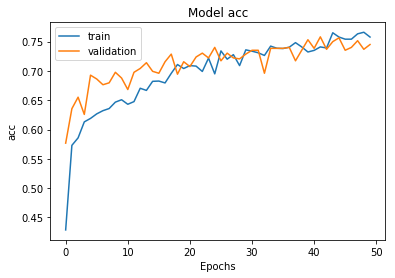

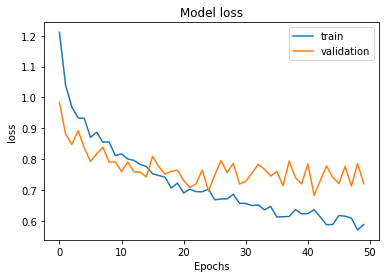

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=69, validation_data=<keras_pre..., validation_steps=20, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
69/69 [==============================] - 17s 250ms/step - loss: 1.2815 - acc: 0.3885 - val_loss: 1.0516 - val_acc: 0.5817
Epoch 2/50
69/69 [==============================] - 16s 233ms/step - loss: 1.1213 - acc: 0.5255 - val_loss: 0.9697 - val_acc: 0.6487
Epoch 3/50
69/69 [==============================] - 17s 241ms/step - loss: 1.0359 - acc: 0.5524 - val_loss: 0.9237 - val_acc: 0.6291
Epoch 4/50
69/69 [==============================] - 16s 236ms/step - loss: 0.9805 - acc: 0.5932 - val_loss: 0.8511 - val_acc: 0.6650
Epoch 5/50
69/69 [==============================] - 16s 232ms/step - loss: 0.9361 - acc: 0.6131 - val_loss: 0.8379 - val_acc: 0.6944
Epoch 6/50
69/69 [==============================] - 16s 237ms/step - loss: 0.9184 - acc: 0.6174 - val_loss: 0.8409 - val_acc: 0.6912
Epoch 7/50
69/69 [==============================] - 16s 237ms/step - loss: 0.8882 - acc: 0.6215 - val_loss: 0.8124 - val_acc: 0.6765
Epoch 8/50
69/69 [==============================] - 16s 234ms/step - 

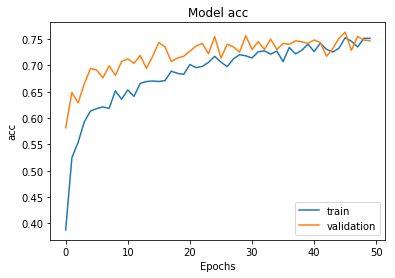

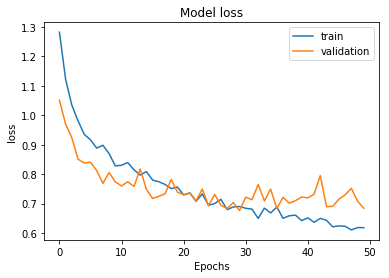

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=35, validation_data=<keras_pre..., validation_steps=10, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
35/35 [==============================] - 16s 445ms/step - loss: 1.3999 - acc: 0.2626 - val_loss: 1.3847 - val_acc: 0.2598
Epoch 2/50
35/35 [==============================] - 15s 419ms/step - loss: 1.2869 - acc: 0.3555 - val_loss: 1.0343 - val_acc: 0.5539
Epoch 3/50
35/35 [==============================] - 15s 419ms/step - loss: 1.0863 - acc: 0.5404 - val_loss: 0.9407 - val_acc: 0.6160
Epoch 4/50
35/35 [==============================] - 15s 424ms/step - loss: 1.0144 - acc: 0.5904 - val_loss: 0.9022 - val_acc: 0.6422
Epoch 5/50
35/35 [==============================] - 15s 421ms/step - loss: 0.9544 - acc: 0.6141 - val_loss: 0.8696 - val_acc: 0.6585
Epoch 6/50
35/35 [==============================] - 15s 419ms/step - loss: 0.9327 - acc: 0.6146 - val_loss: 0.8505 - val_acc: 0.6699
Epoch 7/50
35/35 [==============================] - 15s 421ms/step - loss: 0.9044 - acc: 0.6293 - val_loss: 0.8271 - val_acc: 0.6797
Epoch 8/50
35/35 [==============================] - 15s 422ms/step - 

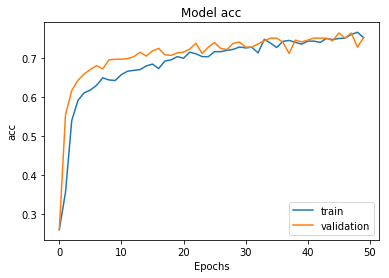

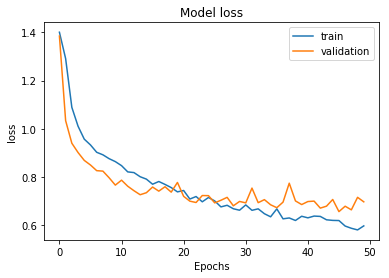

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 49s 358ms/step - loss: 1.5345 - acc: 0.3722 - val_loss: 1.0425 - val_acc: 0.5180
Epoch 2/50
138/138 [==============================] - 48s 348ms/step - loss: 1.1033 - acc: 0.5183 - val_loss: 0.9569 - val_acc: 0.5670
Epoch 3/50
138/138 [==============================] - 48s 346ms/step - loss: 1.0328 - acc: 0.5686 - val_loss: 0.9509 - val_acc: 0.5980
Epoch 4/50
138/138 [==============================] - 48s 347ms/step - loss: 0.9858 - acc: 0.5960 - val_loss: 0.9211 - val_acc: 0.6373
Epoch 5/50
138/138 [==============================] - 48s 346ms/step - loss: 0.9657 - acc: 0.6074 - val_loss: 0.8593 - val_acc: 0.6405
Epoch 6/50
138/138 [==============================] - 48s 349ms/step - loss: 0.9220 - acc: 0.6157 - val_loss: 0.8549 - val_acc: 0.6601
Epoch 7/50
138/138 [==============================] - 48s 349ms/st

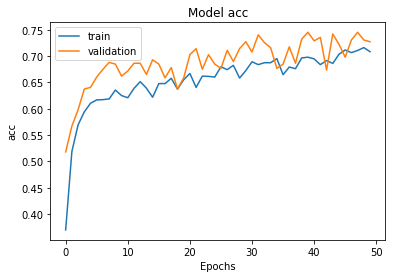

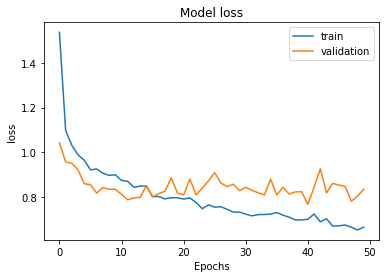

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 43s 616ms/step - loss: 1.4659 - acc: 0.2675 - val_loss: 1.3854 - val_acc: 0.3562
Epoch 2/50
69/69 [==============================] - 41s 589ms/step - loss: 1.3495 - acc: 0.3341 - val_loss: 1.2322 - val_acc: 0.4167
Epoch 3/50
69/69 [==============================] - 40s 586ms/step - loss: 1.2099 - acc: 0.4516 - val_loss: 1.0470 - val_acc: 0.5980
Epoch 4/50
69/69 [==============================] - 41s 589ms/step - loss: 1.0784 - acc: 0.5615 - val_loss: 0.9109 - val_acc: 0.6324
Epoch 5/50
69/69 [==============================] - 41s 589ms/step - loss: 1.0001 - acc: 0.5748 - val_loss: 0.8728 - val_acc: 0.6356
Epoch 6/50
69/69 [==============================] - 40s 585ms/step - loss: 0.9684 - acc: 0.5941 - val_loss: 0.8642 - val_acc: 0.6634
Epoch 7/50
69/69 [==============================] - 41s 590ms/step - loss: 0.9

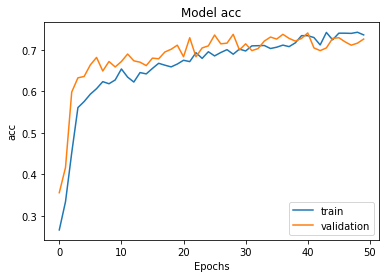

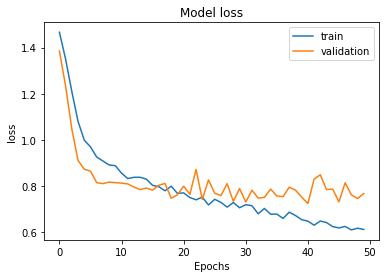

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 40s 1s/step - loss: 1.5274 - acc: 0.2858 - val_loss: 1.3857 - val_acc: 0.3497
Epoch 2/50
35/35 [==============================] - 37s 1s/step - loss: 1.3081 - acc: 0.3604 - val_loss: 1.1854 - val_acc: 0.4183
Epoch 3/50
35/35 [==============================] - 37s 1s/step - loss: 1.1583 - acc: 0.4886 - val_loss: 0.9855 - val_acc: 0.6078
Epoch 4/50
35/35 [==============================] - 37s 1s/step - loss: 1.0529 - acc: 0.5766 - val_loss: 0.9347 - val_acc: 0.6601
Epoch 5/50
35/35 [==============================] - 37s 1s/step - loss: 0.9979 - acc: 0.5748 - val_loss: 0.8570 - val_acc: 0.6324
Epoch 6/50
35/35 [==============================] - 37s 1s/step - loss: 0.9517 - acc: 0.6101 - val_loss: 0.8507 - val_acc: 0.6634
Epoch 7/50
35/35 [==============================] - 37s 1s/step - loss: 0.9218 - acc: 0.6342 - v

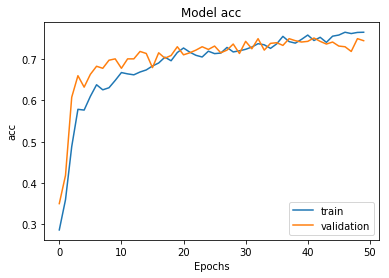

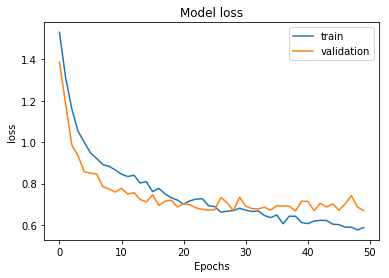

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 21s 150ms/step - loss: 1.1713 - acc: 0.4617 - val_loss: 0.9336 - val_acc: 0.5899
Epoch 2/50
138/138 [==============================] - 20s 143ms/step - loss: 1.0286 - acc: 0.5745 - val_loss: 0.9375 - val_acc: 0.6078
Epoch 3/50
138/138 [==============================] - 20s 142ms/step - loss: 0.9813 - acc: 0.5999 - val_loss: 0.8689 - val_acc: 0.6520
Epoch 4/50
138/138 [==============================] - 20s 144ms/step - loss: 0.9525 - acc: 0.5982 - val_loss: 0.8594 - val_acc: 0.6471
Epoch 5/50
138/138 [==============================] - 20s 145ms/step - loss: 0.9090 - acc: 0.6081 - val_loss: 0.8687 - val_acc: 0.6438
Epoch 6/50
138/138 [==============================] - 20s 141ms/step - loss: 0.9161 - acc: 0.6185 - val_loss: 0.8899 - val_acc: 0.6634
Epoch 7/50
138/138 [==============================] - 20s 143ms/st

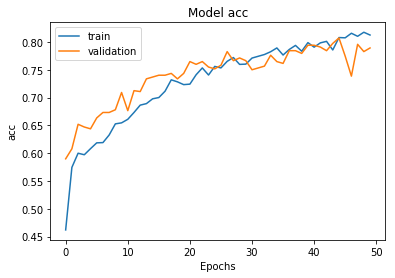

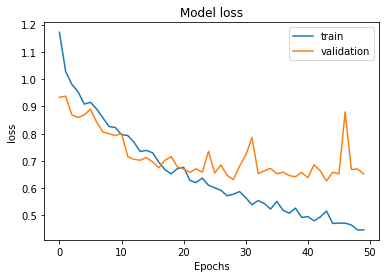

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 19s 277ms/step - loss: 1.2368 - acc: 0.4200 - val_loss: 1.0324 - val_acc: 0.5801
Epoch 2/50
69/69 [==============================] - 18s 261ms/step - loss: 1.0685 - acc: 0.5413 - val_loss: 0.9436 - val_acc: 0.6013
Epoch 3/50
69/69 [==============================] - 18s 261ms/step - loss: 1.0027 - acc: 0.5765 - val_loss: 0.8758 - val_acc: 0.6291
Epoch 4/50
69/69 [==============================] - 19s 268ms/step - loss: 0.9702 - acc: 0.5984 - val_loss: 0.8528 - val_acc: 0.6193
Epoch 5/50
69/69 [==============================] - 18s 263ms/step - loss: 0.9311 - acc: 0.5875 - val_loss: 0.8586 - val_acc: 0.6356
Epoch 6/50
69/69 [==============================] - 18s 263ms/step - loss: 0.8955 - acc: 0.6065 - val_loss: 0.8388 - val_acc: 0.6422
Epoch 7/50
69/69 [==============================] - 18s 263ms/step - loss: 0.8

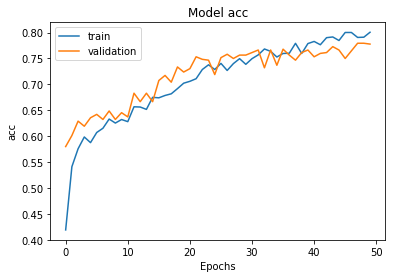

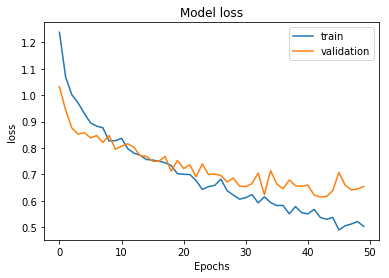

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 18s 512ms/step - loss: 1.2252 - acc: 0.4377 - val_loss: 1.0595 - val_acc: 0.5784
Epoch 2/50
35/35 [==============================] - 17s 486ms/step - loss: 1.0605 - acc: 0.5391 - val_loss: 0.9792 - val_acc: 0.5899
Epoch 3/50
35/35 [==============================] - 17s 491ms/step - loss: 1.0137 - acc: 0.5775 - val_loss: 0.9253 - val_acc: 0.6291
Epoch 4/50
35/35 [==============================] - 17s 490ms/step - loss: 0.9668 - acc: 0.5891 - val_loss: 0.8940 - val_acc: 0.6422
Epoch 5/50
35/35 [==============================] - 17s 489ms/step - loss: 0.9481 - acc: 0.5904 - val_loss: 0.9466 - val_acc: 0.6176
Epoch 6/50
35/35 [==============================] - 17s 496ms/step - loss: 0.9226 - acc: 0.6248 - val_loss: 0.8586 - val_acc: 0.6650
Epoch 7/50
35/35 [==============================] - 17s 489ms/step - loss: 0.8

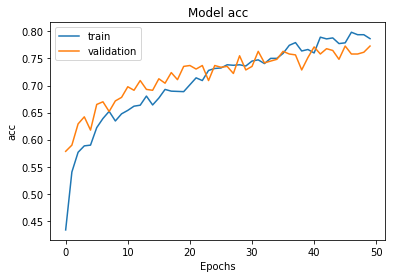

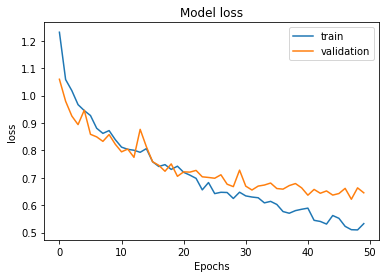

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 54s 388ms/step - loss: 1.2486 - acc: 0.4182 - val_loss: 1.0352 - val_acc: 0.5768
Epoch 2/50
138/138 [==============================] - 53s 381ms/step - loss: 1.0590 - acc: 0.5619 - val_loss: 0.9402 - val_acc: 0.6275
Epoch 3/50
138/138 [==============================] - 52s 379ms/step - loss: 0.9635 - acc: 0.6008 - val_loss: 0.9120 - val_acc: 0.6634
Epoch 4/50
138/138 [==============================] - 52s 380ms/step - loss: 0.9655 - acc: 0.6090 - val_loss: 0.8677 - val_acc: 0.6716
Epoch 5/50
138/138 [==============================] - 52s 379ms/step - loss: 0.8976 - acc: 0.6293 - val_loss: 0.8452 - val_acc: 0.6732
Epoch 6/50
138/138 [==============================] - 52s 378ms/step - loss: 0.8972 - acc: 0.6366 - val_loss: 0.8503 - val_acc: 0.6748
Epoch 7/50
138/138 [==============================] - 52s 376ms/st

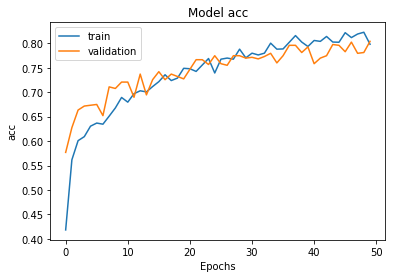

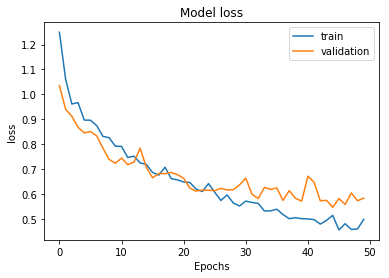

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 52s 750ms/step - loss: 1.2077 - acc: 0.4313 - val_loss: 1.0001 - val_acc: 0.5850
Epoch 2/50
69/69 [==============================] - 50s 721ms/step - loss: 1.0286 - acc: 0.5701 - val_loss: 0.9475 - val_acc: 0.6373
Epoch 3/50
69/69 [==============================] - 50s 721ms/step - loss: 0.9834 - acc: 0.5862 - val_loss: 0.9180 - val_acc: 0.6650
Epoch 4/50
69/69 [==============================] - 50s 717ms/step - loss: 0.9031 - acc: 0.6240 - val_loss: 0.8235 - val_acc: 0.6814
Epoch 5/50
69/69 [==============================] - 50s 722ms/step - loss: 0.8941 - acc: 0.6337 - val_loss: 0.8034 - val_acc: 0.6732
Epoch 6/50
69/69 [==============================] - 50s 724ms/step - loss: 0.8604 - acc: 0.6415 - val_loss: 0.8118 - val_acc: 0.7059
Epoch 7/50
69/69 [==============================] - 50s 721ms/step - loss: 0.8

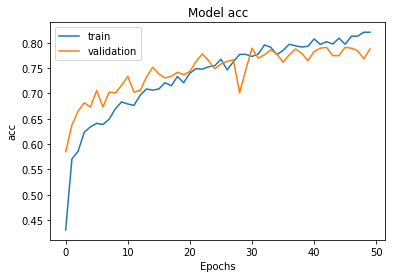

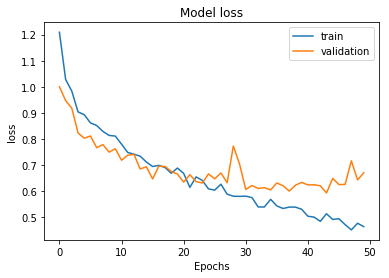

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 52s 1s/step - loss: 1.2331 - acc: 0.4386 - val_loss: 1.0988 - val_acc: 0.5490
Epoch 2/50
35/35 [==============================] - 50s 1s/step - loss: 1.0732 - acc: 0.5511 - val_loss: 0.9112 - val_acc: 0.6324
Epoch 3/50
35/35 [==============================] - 49s 1s/step - loss: 0.9740 - acc: 0.5918 - val_loss: 0.9513 - val_acc: 0.6160
Epoch 4/50
35/35 [==============================] - 49s 1s/step - loss: 0.9607 - acc: 0.6070 - val_loss: 0.8583 - val_acc: 0.6683
Epoch 5/50
35/35 [==============================] - 49s 1s/step - loss: 0.9293 - acc: 0.6168 - val_loss: 0.8451 - val_acc: 0.6928
Epoch 6/50
35/35 [==============================] - 49s 1s/step - loss: 0.8882 - acc: 0.6373 - val_loss: 0.8525 - val_acc: 0.6977
Epoch 7/50
35/35 [==============================] - 49s 1s/step - loss: 0.8893 - acc: 0.6257 - v

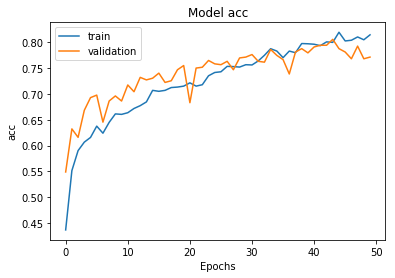

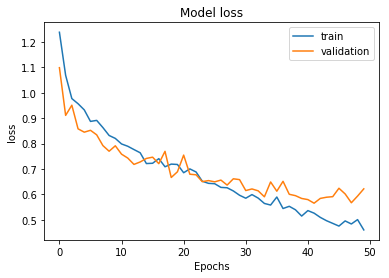

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 22s 158ms/step - loss: 1.2389 - acc: 0.3997 - val_loss: 1.0722 - val_acc: 0.5703
Epoch 2/50
138/138 [==============================] - 20s 145ms/step - loss: 1.0268 - acc: 0.5398 - val_loss: 0.8869 - val_acc: 0.6209
Epoch 3/50
138/138 [==============================] - 20s 146ms/step - loss: 0.9797 - acc: 0.5727 - val_loss: 0.8556 - val_acc: 0.6324
Epoch 4/50
138/138 [==============================] - 20s 148ms/step - loss: 0.9508 - acc: 0.5960 - val_loss: 0.8148 - val_acc: 0.6405
Epoch 5/50
138/138 [==============================] - 21s 149ms/step - loss: 0.8819 - acc: 0.6211 - val_loss: 0.8606 - val_acc: 0.6029
Epoch 6/50
138/138 [==============================] - 20s 146ms/step - loss: 0.8650 - acc: 0.6135 - val_loss: 0.7794 - val_acc: 0.6536
Epoch 7/50
138/138 [==============================] - 20s 147ms/st

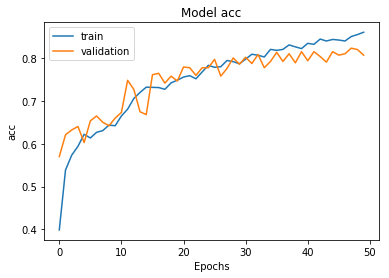

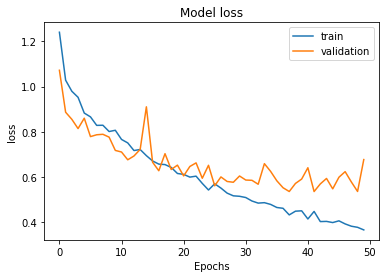

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 20s 291ms/step - loss: 1.2584 - acc: 0.4050 - val_loss: 1.0413 - val_acc: 0.5229
Epoch 2/50
69/69 [==============================] - 19s 274ms/step - loss: 1.0290 - acc: 0.5422 - val_loss: 0.9201 - val_acc: 0.5964
Epoch 3/50
69/69 [==============================] - 19s 276ms/step - loss: 0.9828 - acc: 0.5878 - val_loss: 0.8998 - val_acc: 0.6078
Epoch 4/50
69/69 [==============================] - 19s 277ms/step - loss: 0.9494 - acc: 0.5973 - val_loss: 0.9017 - val_acc: 0.6095
Epoch 5/50
69/69 [==============================] - 19s 273ms/step - loss: 0.9267 - acc: 0.6011 - val_loss: 0.8528 - val_acc: 0.6454
Epoch 6/50
69/69 [==============================] - 19s 275ms/step - loss: 0.8927 - acc: 0.6320 - val_loss: 0.8768 - val_acc: 0.6503
Epoch 7/50
69/69 [==============================] - 19s 276ms/step - loss: 0.8

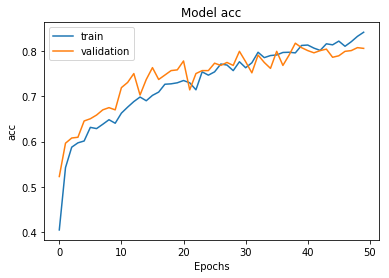

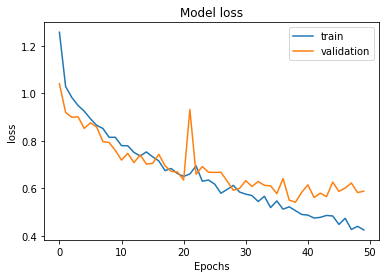

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 19s 555ms/step - loss: 1.2511 - acc: 0.4203 - val_loss: 1.0229 - val_acc: 0.5507
Epoch 2/50
35/35 [==============================] - 18s 511ms/step - loss: 1.0586 - acc: 0.5346 - val_loss: 0.9209 - val_acc: 0.6095
Epoch 3/50
35/35 [==============================] - 18s 519ms/step - loss: 1.0195 - acc: 0.5458 - val_loss: 0.9728 - val_acc: 0.6062
Epoch 4/50
35/35 [==============================] - 18s 519ms/step - loss: 0.9608 - acc: 0.5882 - val_loss: 0.8771 - val_acc: 0.6160
Epoch 5/50
35/35 [==============================] - 18s 524ms/step - loss: 0.9223 - acc: 0.6047 - val_loss: 0.8645 - val_acc: 0.6356
Epoch 6/50
35/35 [==============================] - 18s 521ms/step - loss: 0.9147 - acc: 0.6092 - val_loss: 0.8570 - val_acc: 0.6356
Epoch 7/50
35/35 [==============================] - 18s 517ms/step - loss: 0.8

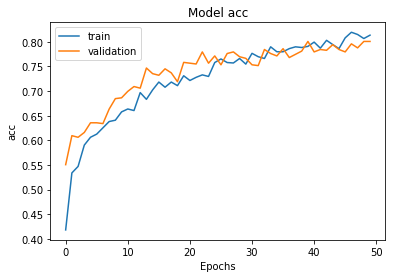

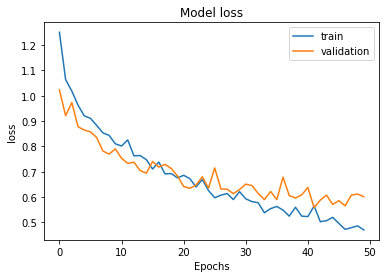

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 58s 418ms/step - loss: 1.3595 - acc: 0.2986 - val_loss: 1.2614 - val_acc: 0.4314
Epoch 2/50
138/138 [==============================] - 57s 413ms/step - loss: 1.1471 - acc: 0.4994 - val_loss: 1.0151 - val_acc: 0.6176
Epoch 3/50
138/138 [==============================] - 56s 405ms/step - loss: 1.0701 - acc: 0.5695 - val_loss: 0.9699 - val_acc: 0.6389
Epoch 4/50
138/138 [==============================] - 56s 405ms/step - loss: 0.9995 - acc: 0.5844 - val_loss: 0.8804 - val_acc: 0.6324
Epoch 5/50
138/138 [==============================] - 56s 405ms/step - loss: 0.9559 - acc: 0.5860 - val_loss: 0.9310 - val_acc: 0.6275
Epoch 6/50
138/138 [==============================] - 56s 406ms/step - loss: 0.9185 - acc: 0.6017 - val_loss: 0.8367 - val_acc: 0.6650
Epoch 7/50
138/138 [==============================] - 56s 403ms/st

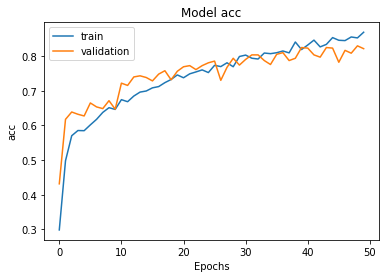

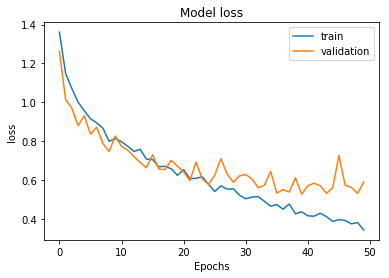

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 57s 823ms/step - loss: 1.1810 - acc: 0.4659 - val_loss: 0.9443 - val_acc: 0.5866
Epoch 2/50
69/69 [==============================] - 54s 789ms/step - loss: 1.0184 - acc: 0.5794 - val_loss: 0.8814 - val_acc: 0.6716
Epoch 3/50
69/69 [==============================] - 54s 789ms/step - loss: 0.9365 - acc: 0.6197 - val_loss: 0.8725 - val_acc: 0.6781
Epoch 4/50
69/69 [==============================] - 55s 790ms/step - loss: 0.9106 - acc: 0.6342 - val_loss: 0.8022 - val_acc: 0.6928
Epoch 5/50
69/69 [==============================] - 54s 788ms/step - loss: 0.8683 - acc: 0.6392 - val_loss: 0.7979 - val_acc: 0.6814
Epoch 6/50
69/69 [==============================] - 54s 787ms/step - loss: 0.8406 - acc: 0.6591 - val_loss: 0.8646 - val_acc: 0.6781
Epoch 7/50
69/69 [==============================] - 54s 787ms/step - loss: 0.8

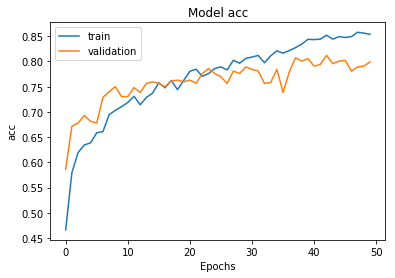

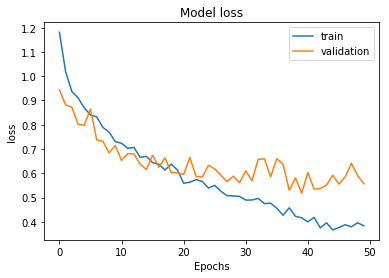

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 57s 2s/step - loss: 1.2813 - acc: 0.3837 - val_loss: 1.1043 - val_acc: 0.6209
Epoch 2/50
35/35 [==============================] - 54s 2s/step - loss: 1.0627 - acc: 0.5502 - val_loss: 0.9469 - val_acc: 0.6242
Epoch 3/50
35/35 [==============================] - 54s 2s/step - loss: 1.0164 - acc: 0.5784 - val_loss: 0.8769 - val_acc: 0.6209
Epoch 4/50
35/35 [==============================] - 54s 2s/step - loss: 0.9653 - acc: 0.6047 - val_loss: 0.8483 - val_acc: 0.6487
Epoch 5/50
35/35 [==============================] - 54s 2s/step - loss: 0.9395 - acc: 0.6105 - val_loss: 0.8308 - val_acc: 0.6503
Epoch 6/50
35/35 [==============================] - 54s 2s/step - loss: 0.8984 - acc: 0.6275 - val_loss: 0.8010 - val_acc: 0.6536
Epoch 7/50
35/35 [==============================] - 54s 2s/step - loss: 0.8845 - acc: 0.6253 - v

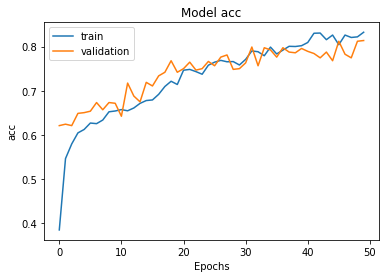

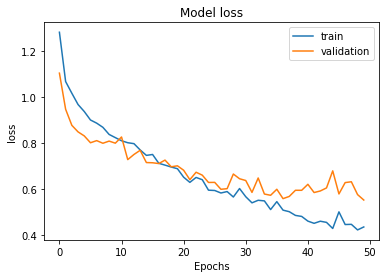

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 22s 159ms/step - loss: 1.2192 - acc: 0.4282 - val_loss: 0.9400 - val_acc: 0.5801
Epoch 2/50
138/138 [==============================] - 21s 151ms/step - loss: 1.0230 - acc: 0.5646 - val_loss: 0.8993 - val_acc: 0.5866
Epoch 3/50
138/138 [==============================] - 21s 152ms/step - loss: 0.9657 - acc: 0.5871 - val_loss: 0.8717 - val_acc: 0.6225
Epoch 4/50
138/138 [==============================] - 20s 147ms/step - loss: 0.8965 - acc: 0.6063 - val_loss: 0.8373 - val_acc: 0.6225
Epoch 5/50
138/138 [==============================] - 21s 152ms/step - loss: 0.8950 - acc: 0.6036 - val_loss: 0.8014 - val_acc: 0.6291
Epoch 6/50
138/138 [==============================] - 21s 151ms/step - loss: 0.8432 - acc: 0.6155 - val_loss: 0.7954 - val_acc: 0.6291
Epoch 7/50
138/138 [==============================] - 21s 150ms/st

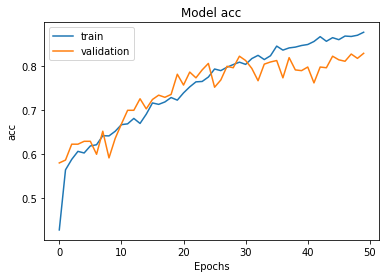

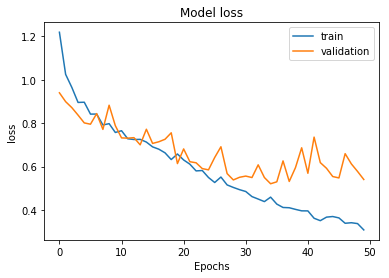

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 21s 300ms/step - loss: 1.2760 - acc: 0.3785 - val_loss: 1.0255 - val_acc: 0.5768
Epoch 2/50
69/69 [==============================] - 20s 288ms/step - loss: 1.0730 - acc: 0.5352 - val_loss: 0.9144 - val_acc: 0.5915
Epoch 3/50
69/69 [==============================] - 19s 277ms/step - loss: 0.9654 - acc: 0.5900 - val_loss: 0.9760 - val_acc: 0.5588
Epoch 4/50
69/69 [==============================] - 20s 283ms/step - loss: 0.9177 - acc: 0.6014 - val_loss: 0.8885 - val_acc: 0.6127
Epoch 5/50
69/69 [==============================] - 19s 277ms/step - loss: 0.8700 - acc: 0.6224 - val_loss: 0.7829 - val_acc: 0.6471
Epoch 6/50
69/69 [==============================] - 20s 284ms/step - loss: 0.8855 - acc: 0.6190 - val_loss: 0.8060 - val_acc: 0.6389
Epoch 7/50
69/69 [==============================] - 19s 282ms/step - loss: 0.8

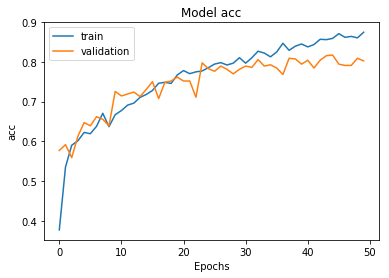

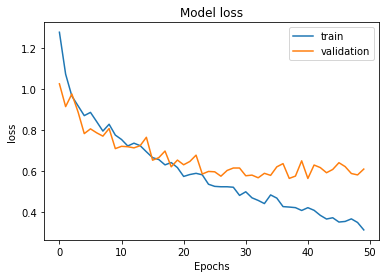

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 20s 562ms/step - loss: 1.2892 - acc: 0.3716 - val_loss: 1.0004 - val_acc: 0.5637
Epoch 2/50
35/35 [==============================] - 19s 535ms/step - loss: 1.0852 - acc: 0.5435 - val_loss: 0.9382 - val_acc: 0.5703
Epoch 3/50
35/35 [==============================] - 18s 528ms/step - loss: 0.9880 - acc: 0.5641 - val_loss: 0.9093 - val_acc: 0.5866
Epoch 4/50
35/35 [==============================] - 19s 531ms/step - loss: 0.9801 - acc: 0.5730 - val_loss: 0.8971 - val_acc: 0.5948
Epoch 5/50
35/35 [==============================] - 18s 527ms/step - loss: 0.9074 - acc: 0.6038 - val_loss: 0.9306 - val_acc: 0.5899
Epoch 6/50
35/35 [==============================] - 19s 537ms/step - loss: 0.8919 - acc: 0.6222 - val_loss: 0.7999 - val_acc: 0.6291
Epoch 7/50
35/35 [==============================] - 18s 528ms/step - loss: 0.8

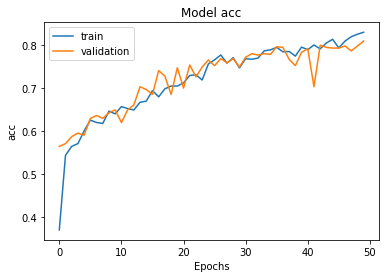

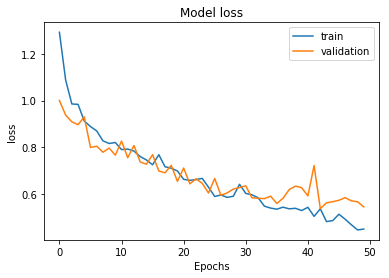

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
138/138 [==============================] - 60s 438ms/step - loss: 1.2085 - acc: 0.4255 - val_loss: 1.0633 - val_acc: 0.5997
Epoch 2/50
138/138 [==============================] - 59s 425ms/step - loss: 1.0270 - acc: 0.5684 - val_loss: 0.8597 - val_acc: 0.6144
Epoch 3/50
138/138 [==============================] - 59s 426ms/step - loss: 0.9491 - acc: 0.6035 - val_loss: 0.8904 - val_acc: 0.5931
Epoch 4/50
138/138 [==============================] - 58s 423ms/step - loss: 0.9103 - acc: 0.5986 - val_loss: 0.8107 - val_acc: 0.6356
Epoch 5/50
138/138 [==============================] - 59s 426ms/step - loss: 0.8621 - acc: 0.6163 - val_loss: 0.7950 - val_acc: 0.6291
Epoch 6/50
138/138 [==============================] - 58s 423ms/step - loss: 0.8456 - acc: 0.6303 - val_loss: 0.8438 - val_acc: 0.6454
Epoch 7/50
138/138 [==============================] - 59s 426ms/st

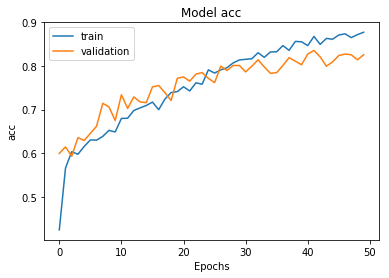

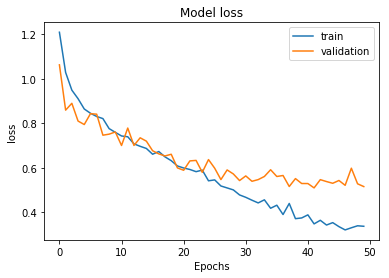

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
69/69 [==============================] - 60s 862ms/step - loss: 1.2948 - acc: 0.3724 - val_loss: 1.1543 - val_acc: 0.5229
Epoch 2/50
69/69 [==============================] - 57s 831ms/step - loss: 1.0814 - acc: 0.5344 - val_loss: 0.9088 - val_acc: 0.5997
Epoch 3/50
69/69 [==============================] - 57s 833ms/step - loss: 1.0092 - acc: 0.5590 - val_loss: 0.8662 - val_acc: 0.5915
Epoch 4/50
69/69 [==============================] - 58s 833ms/step - loss: 0.9404 - acc: 0.5937 - val_loss: 0.8456 - val_acc: 0.6046
Epoch 5/50
69/69 [==============================] - 57s 830ms/step - loss: 0.8949 - acc: 0.6077 - val_loss: 0.8357 - val_acc: 0.6732
Epoch 6/50
69/69 [==============================] - 58s 845ms/step - loss: 0.8837 - acc: 0.6113 - val_loss: 0.8055 - val_acc: 0.6389
Epoch 7/50
69/69 [==============================] - 58s 835ms/step - loss: 0.8

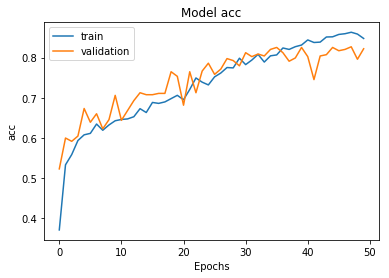

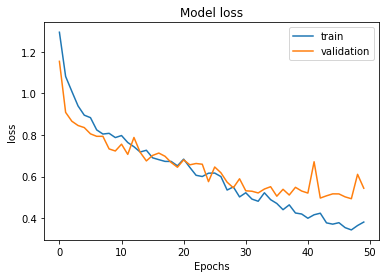

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.
Epoch 1/50
35/35 [==============================] - 61s 2s/step - loss: 1.2302 - acc: 0.4167 - val_loss: 1.0304 - val_acc: 0.5719
Epoch 2/50
35/35 [==============================] - 57s 2s/step - loss: 1.0414 - acc: 0.5547 - val_loss: 0.9845 - val_acc: 0.5703
Epoch 3/50
35/35 [==============================] - 57s 2s/step - loss: 1.0083 - acc: 0.5650 - val_loss: 0.8994 - val_acc: 0.6275
Epoch 4/50
35/35 [==============================] - 57s 2s/step - loss: 0.9783 - acc: 0.5846 - val_loss: 0.8629 - val_acc: 0.6225
Epoch 5/50
35/35 [==============================] - 57s 2s/step - loss: 0.9395 - acc: 0.6007 - val_loss: 0.8437 - val_acc: 0.6422
Epoch 6/50
35/35 [==============================] - 57s 2s/step - loss: 0.8932 - acc: 0.6114 - val_loss: 0.8148 - val_acc: 0.6503
Epoch 7/50
35/35 [==============================] - 57s 2s/step - loss: 0.8751 - acc: 0.6177 - v

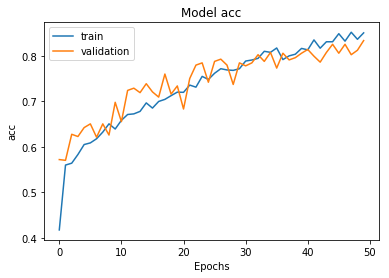

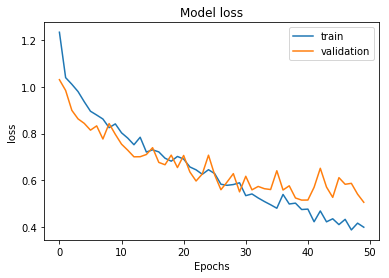

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


ValueError: Negative dimension size caused by subtracting 3 from 2 for 'conv2d_69/convolution' (op: 'Conv2D') with input shapes: [?,2,2,128], [3,3,128,256].

In [9]:
Results = []

for nb_layers in range(1,6):
    for img_size in [64,128]: 
        for batch_size in [16,32,64]:
            train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
            model = create_model(32,nb_layers,img_size = img_size)
            History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
            print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
            draw_graph(History, 'acc')
            draw_graph(History, 'loss')
            result = model.evaluate_generator(test_generator, len(test_generator))
            Results.append(result)
        


In [ ]:
save_model(model)

draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [38]:
i = 0
print('Layers ' + ' ImgSize ' + ' Bathc size ' + ' Accuracy ')
for nb_layers in range(1,5):
    for img_size in [64,128]: 
        for batch_size in [16,32,64]:
            #print( ''  str(nb_layers) + ' %3d' + str(img_size) + '  %2' + str(batch_size) + ' '+ str(Results[i][0]))
            print( '%6d  %7d  %10d  %8.3f ' % (nb_layers,img_size,batch_size,Results[i][1]*100))
            i = i + 1
     
    

Layers  ImgSize  Bathc size  Accuracy 
     1       64          16    71.845 
     1       64          32    72.492 
     1       64          64    71.521 
     1      128          16    71.521 
     1      128          32    70.550 
     1      128          64    73.139 
     2       64          16    77.023 
     2       64          32    75.405 
     2       64          64    76.375 
     2      128          16    79.935 
     2      128          32    77.994 
     2      128          64    74.110 
     3       64          16    79.288 
     3       64          32    79.612 
     3       64          64    78.641 
     3      128          16    79.935 
     3      128          32    79.612 
     3      128          64    78.317 
     4       64          16    78.964 
     4       64          32    75.081 
     4       64          64    77.670 
     4      128          16    77.994 
     4      128          32    78.964 
     4      128          64    79.288 


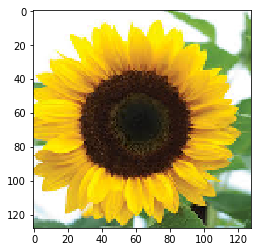

'sunflower'

In [39]:
from keras.preprocessing import image
import numpy as np 

def predict_flower(model = model, image_path = 'sunflower.jpg'):
    img = image.load_img(path=image_path,target_size=(128,128,3))
    plt.imshow(img)
    plt.show()
    img = np.reshape(img,[1,128,128,3])
    pred = model.predict([img])
    return find_label(pred[0])

predict_flower()

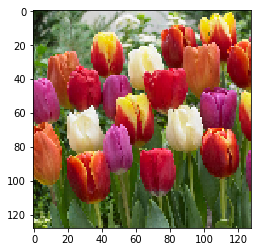

'tulip'

In [40]:
predict_flower(model, 'tulip.jpg')

Found 309 images belonging to 4 classes.
Confusion matrix, without normalization


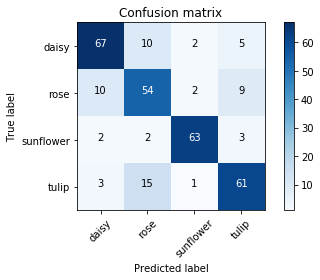

In [41]:
from sklearn.metrics import confusion_matrix

def create_cm_for_test(testdatapath = 'testing', img_size = 128):
    datagen = ImageDataGenerator(rescale = 1./255)
    test_generator = datagen.flow_from_directory(testdatapath,
                                            target_size = (img_size, img_size),
                                            class_mode = 'categorical',
                                            shuffle = False
                                            )
    Y_pred = model.predict_generator(test_generator, len(test_generator))
    y_pred = np.argmax(Y_pred, axis=1)
    cm = confusion_matrix(test_generator.classes, y_pred)
    plot_confusion_matrix(cm, test_generator.class_indices)
    
create_cm_for_test()


In [ ]:
img_size = 128
batch_size = 32
nb_layers = 3
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
model = create_model(32,nb_layers,img_size = img_size)
History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 20,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
draw_graph(History, 'acc')
draw_graph(History, 'loss')

In [ ]:
Y_pred = model.predict_generator(test_generator, len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

In [ ]:
(eval_loss, eval_accuracy) = model.evaluate_generator(test_generator, len(test_generator))
print("[INFO] accuracy: {:.2f}%".format(eval_accuracy * 100))
print("[INFO] Loss: {}".format(eval_loss))


In [43]:
nb_layers = 5
img_size = 64
batch_size = 16
train_generator, validation_generator, test_generator = create_generators(img_size = img_size, batch_size = batch_size)
model = create_model(32,nb_layers,img_size = img_size)
History = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              nb_epoch = 50,
                              validation_data = validation_generator,
                              validation_steps = len(validation_generator),
                             )
print('\nNumber of layers: ' + str(nb_layers) + ' ImgSize: ' + str(img_size) + ' Batch size: ' + str(batch_size) + ' :')
draw_graph(History, 'acc')
draw_graph(History, 'loss')
           

Found 2197 images belonging to 4 classes.
Found 612 images belonging to 4 classes.
Found 309 images belonging to 4 classes.


D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
D:\Programs\Anaconda\envs\env\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=138, validation_data=<keras_pre..., validation_steps=39, epochs=50)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/50
  2/138 [..............................] - ETA: 2:48 - loss: 1.4021 - acc: 0.1250

KeyboardInterrupt: 